In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.nan)

#Read data from the CSV
df = pd.read_csv("data.csv")

In [2]:
#Perform one hot encoding of the Country & region columns
onehot_country = pd.get_dummies(df['Country'])
onehot_region = pd.get_dummies(df['Region'])

In [3]:
df=df.drop('Country', axis =1)
df=df.drop('Region', axis =1)

In [4]:
df = df.join(onehot_country)
df = df.join(onehot_region)

In [5]:
# Get the GDP column into a new data frame
df_labels = df['GDP']

In [6]:
#Drop the GDP feature from the original features data frame

df=df.drop('GDP', axis =1)

In [7]:
#Turn the features data frame into a numpy array
features = df.values

#Create imputer to insert nan with mean in the features numpy array
imp = Imputer(missing_values=np.nan, strategy='median')
imp.fit(features)       

features = imp.transform(features)

In [8]:
#Turn the labels data frame into a numpy array

labels = df_labels.values
labels = np.reshape(labels, (-1, 1))

#Create imputer to insert nan with mean in the labels numpy array
imp.fit(labels)       
labels = imp.transform(labels)
 
#Use a Min-Max Scaler to scale data
scalar_features = MinMaxScaler()
scalar_labels = MinMaxScaler()

features = scalar_features.fit_transform(features)
labels =  scalar_labels.fit_transform(labels)

In [9]:
#Split the data into test and train numpy array
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [10]:
#Apply Linear regression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#Predict values using X_test
y_pred = lin_reg.predict(X_test)

In [12]:
#Inverse transform the predictions and actual data
y_test = scalar_labels.inverse_transform(y_test)
y_pred = scalar_labels.inverse_transform(y_pred)

mse = mean_squared_error(y_pred, y_test)
mse

25194409.546062328

In [13]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)

In [14]:
r_squared

0.7304402650331161

In [15]:
np.average(((y_test-y_pred)/y_test)*100)

26.999324141892167

In [16]:
((y_test-y_pred)/y_test)*100

array([[  17.07570668],
       [ -33.7941859 ],
       [ -29.41223405],
       [ -36.40011389],
       [ 121.03651483],
       [ -21.12980805],
       [ -44.39858148],
       [  34.85276257],
       [ -37.45821309],
       [  22.00723436],
       [  27.96454253],
       [  39.63864836],
       [  17.65363572],
       [ 132.37678738],
       [  29.35186514],
       [  15.59105181],
       [ -18.7532606 ],
       [  25.83105606],
       [   9.7340968 ],
       [ -10.50283107],
       [ 201.45511578],
       [ 504.61173608],
       [  43.82607084],
       [   6.52972234],
       [  -9.02526603],
       [  10.50858605],
       [  45.20430168],
       [ -96.99246668],
       [   1.61397541],
       [ 124.28812145],
       [ -18.45441602],
       [ -59.87823384],
       [  36.63575624],
       [  71.17580528],
       [  65.14749064],
       [ -97.14791466],
       [-167.63505944],
       [ -13.70261785],
       [ 258.17467667],
       [-369.09327146],
       [-273.54951487],
       [  34.625

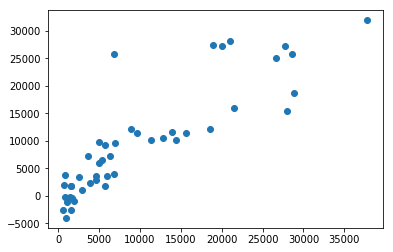

In [17]:
plt.scatter(y_test, y_pred)
plt.show()